In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
#!pip install gensim
#!pip install stemmer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import *
from nltk.stem.porter import *
import nltk.stem as stemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shikshya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Wrangling Exercise

I am using the Twitter Sentiment Analysis Dataset, which can be found here. https://www.kaggle.com/datasets/kazanova/sentiment140. I am using this dataset to build a model that identifies body shaming tweets. 

In [3]:
data = pd.read_csv('Twittertext.csv', encoding='latin-1', header = None)

In [4]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
#renaming columns
data = data.rename(columns = {0: 'polarity', 1: 'ids', 2: 'date', 3: 'flag', 4: 'user', 5: 'text'})

In [6]:
data.head()
# In the sentiment analysis dataset, 0: negative, 2: neutral, 4: positive 


,polarity,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
data.shape

(1600000, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   ids       1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   flag      1600000 non-null  object
 4   user      1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


The next steps are to ensure that the texts are readable and analyzable. I will remove any numbers or symbols from the text because they are of no analytical importance.

In [9]:
#https://stackoverflow.com/questions/25292838/applying-regex-to-a-pandas-dataframe
import re

# def string(column):
#     re.sub(r'[^a-zA-Z\s\t]+', "", column)   
#data['text2'] = data['text'].apply(string)
#df['Season2'] = df['Season'].apply(split_it)
# import re
# re.sub(r'[^a-zA-Z\s\t]+', "", list_text)

In [10]:
data['text2'] = data['text'].astype(str)

In [11]:
data.head()

,polarity,ids,date,flag,user,text,text2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [12]:
#using regular expression
data['text_2'] =  data['text2'].apply(lambda x: re.sub(r'[^a-zA-Z\s\t]+', "", str(x)))

In [13]:
data.head()

,polarity,ids,date,flag,user,text,text2,text_2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl Awww thats a bum...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   ids       1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   flag      1600000 non-null  object
 4   user      1600000 non-null  object
 5   text      1600000 non-null  object
 6   text2     1600000 non-null  object
 7   text_2    1600000 non-null  object
dtypes: int64(2), object(6)
memory usage: 97.7+ MB


In [15]:
#data['text_2'] = data['text_2'].astype(str)

In [16]:
#data.info()

In [17]:
text = data['text_2']

### Exploratory Data Analysis

At this point, I am going to explore the corpus of my texts and see which words are the most common. I am going to use a wordcloud generator.

In [18]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
wordcloud = WordCloud().generate(" ".join(text))

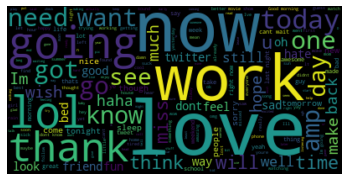

In [19]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The most common words here are not of interest to my analysis. I will therefore look at tweets that contain some of the most common body shaming related words and generate a word cloud and bar graph out of those tweets. 

In [20]:
my_vocab = ['ugly', 'fat', 'body', 'dark', 'heavy', 'jiggle', 'short', 'tall', 'skinny', 'skin']

In [21]:
def text_contains_my_vocab(tweet):
    tweet_parts = tweet.split(' ')
    for tweet_part in tweet_parts:
        if tweet_part in my_vocab:
            return 1
    return 0


#https://stackoverflow.com/questions/28914078/filter-out-rows-based-on-list-of-strings-in-pandas
#data['vocab'] = np.where(text_contains_my_vocab(data['text_2'].str),1,0)

In [22]:
data['vocab'] = data['text_2'].map(text_contains_my_vocab)

In [23]:
#data2 = data[data.stack().str.contains('|'.join(my_vocab)).any(level=0)]
#data['vocab'] = np.where(data.text_2.str.contains('|'.join(my_vocab)),1,0)

In [24]:
data.head()

,polarity,ids,date,flag,user,text,text2,text_2,vocab
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl Awww thats a bum...,0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,1
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,0


In [25]:
data1 = data[data['vocab'] == 1]

In [26]:
data1.shape

(10782, 9)

In [27]:
data1.head()

,polarity,ids,date,flag,user,text,text2,text_2,vocab
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,1
44,0,1467819022,Mon Apr 06 22:21:56 PDT 2009,NO_QUERY,hpfangirl94,Falling asleep. Just heard about that Tracy gi...,Falling asleep. Just heard about that Tracy gi...,Falling asleep Just heard about that Tracy gir...,1
72,0,1467825863,Mon Apr 06 22:23:43 PDT 2009,NO_QUERY,BrookeAmanda,i really hate how people diss my bands! Trace...,i really hate how people diss my bands! Trace...,i really hate how people diss my bands Trace ...,1
88,0,1467835198,Mon Apr 06 22:26:08 PDT 2009,NO_QUERY,ItsBrigittaYo,why is it always the fat ones?!,why is it always the fat ones?!,why is it always the fat ones,1
129,0,1467841885,Mon Apr 06 22:27:56 PDT 2009,NO_QUERY,MissPassion,@thecoolestout Ehhh don't. Weather's gonna tak...,@thecoolestout Ehhh don't. Weather's gonna tak...,thecoolestout Ehhh dont Weathers gonna take a ...,1


In [28]:
text1 = data1['text_2']

Next step would be to remove stop words.

In [29]:
#https://openclassrooms.com/en/courses/6532301-introduction-to-natural-language-processing/6980726-remove-stop-words-from-a-block-of-text

from collections import Counter
# # transform the text into a list of words
# words_list = text1.split(' ')
# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']
# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in text1 if word not in stopwords ]


In [30]:
wordcloud1 = WordCloud().generate(" ".join(words_without_stopwords))

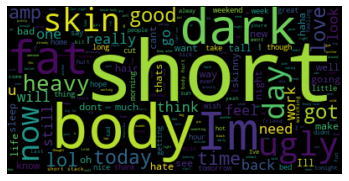

In [31]:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

It is interesting that 'dark', 'body', 'short', 'ugly' are some of the most common words. 

Next, I want to create a bar graph showing the most common words.

In [32]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
words_split = [tweet.lower().split() for tweet in words_without_stopwords]


In [33]:
import itertools
# List of all words across tweets
all_words = list(itertools.chain(*words_split))

In [34]:
import collections
from collections import Counter
word_count = collections.Counter(all_words)

word_count.most_common(15)

[('i', 6111),
 ('the', 4704),
 ('to', 4183),
 ('a', 4123),
 ('my', 4025),
 ('and', 3338),
 ('short', 2721),
 ('is', 2609),
 ('body', 2321),
 ('in', 2163),
 ('it', 2003),
 ('of', 1890),
 ('for', 1695),
 ('im', 1621),
 ('dark', 1522)]

The stopwords that I use earlier did not quite do the trick. I am going to use the stopwords from nltk.

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shikshya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# #https://stackoverflow.com/questions/63018726/counter-and-plot-the-most-common-word-in-a-text
# tf = Counter(words_without_stopwords)

In [37]:
#import tweepy as tw
#import nltk
from nltk.corpus import stopwords
import re
import networkx

In [38]:
stop_words = set(stopwords.words('english'))

In [39]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_split]

In [40]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(20)

[('short', 2721),
 ('body', 2321),
 ('im', 1621),
 ('dark', 1522),
 ('fat', 1450),
 ('ugly', 909),
 ('like', 901),
 ('skin', 849),
 ('heavy', 805),
 ('get', 649),
 ('good', 621),
 ('day', 560),
 ('got', 531),
 ('dont', 516),
 ('really', 503),
 ('time', 503),
 ('go', 500),
 ('today', 472),
 ('love', 450),
 ('cant', 444)]

We see that some of the words that can be used to body shame, such as 'short', 'body', 'fat', 'dark' is among the top 20 most common words.

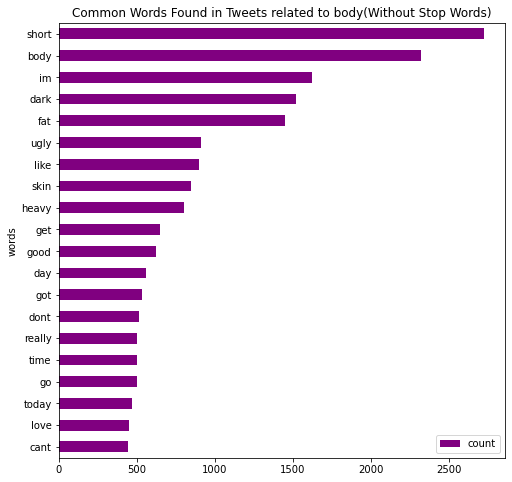

In [41]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(20),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets related to body(Without Stop Words)")

plt.show()

### Pre-processing and modeling

#### Count Vectorizer

First, I am going to use count vectorizer to vectorize the corpus.

In [42]:
list_text = data1.text_2.tolist()

In [43]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [44]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/shikshya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shikshya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [47]:
#https://stackoverflow.com/questions/47423854/sklearn-adding-lemmatizer-to-countvectorizer
#https://www.studytonight.com/post/scikitlearn-countvectorizer-in-nlp

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words = 'english') 
# max_df = 0.25, min_df = 10)

In [48]:
vect.fit(list_text)

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CountVectorizer(stop_words='english',
                tokenizer=<__main__.LemmaTokenizer object at 0x7fc49cf43f10>)

In [49]:
word_list = vect.get_feature_names()

In [50]:
simple_text = vect.transform(list_text)
simple_text

<10782x19124 sparse matrix of type '<class 'numpy.int64'>'
	with 99274 stored elements in Compressed Sparse Row format>

In [51]:
simple_text.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
#https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
count_list = simple_text.toarray().sum(axis=0)

In [53]:
df = pd.DataFrame(simple_text.toarray(), columns=vect.get_feature_names())

In [54]:
df.head()

,aa,aaaaaaaaaahhhhhhhhhhhyou,aaaaaaaaagh,aaaaaaaargh,aaaaaah,aaaaaahhh,aaaaamazing,aaaah,aaaahhh,aaaahhhh,...,zopiclone,zsbcreations,zsh,ztnark,zucchinibikini,zunehd,zurann,zurich,zutradio,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
print (dict(zip(word_list,count_list)))

{'aa': 2, 'aaaaaaaaaahhhhhhhhhhhyou': 1, 'aaaaaaaaagh': 1, 'aaaaaaaargh': 1, 'aaaaaah': 1, 'aaaaaahhh': 1, 'aaaaamazing': 1, 'aaaah': 1, 'aaaahhh': 1, 'aaaahhhh': 1, 'aaaggh': 1, 'aaah': 2, 'aaahhh': 2, 'aaand': 1, 'aaarrgghh': 1, 'aafreen': 1, 'aah': 4, 'aahah': 1, 'aahhh': 1, 'aaliyah': 1, 'aaliyahlooking': 1, 'aami': 1, 'aardvark': 1, 'aaron': 1, 'aarong': 1, 'aarrgghh': 2, 'aarya': 1, 'aatifaa': 1, 'ab': 11, 'aba': 3, 'abandoned': 1, 'abattista': 1, 'abbabased': 1, 'abbieabbiee': 1, 'abc': 3, 'abdo': 1, 'abducted': 1, 'abegler': 1, 'abelle': 1, 'abercrombie': 1, 'aberdeen': 1, 'ability': 4, 'abit': 2, 'abl': 2, 'able': 42, 'abnormal': 1, 'abnormally': 1, 'abounds': 1, 'aboutwhat': 1, 'abowlesy': 1, 'abroad': 1, 'abroadquot': 1, 'abscence': 1, 'absence': 1, 'absgot': 1, 'absolute': 3, 'absolutely': 10, 'absolutelychefdarius': 1, 'absolutley': 1, 'absolutly': 1, 'absurdly': 1, 'absynthe': 1, 'abt': 3, 'abubai': 1, 'abundant': 1, 'abursdist': 2, 'abuse': 4, 'abused': 1, 'abyss': 1, 'a

In [56]:
#https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-1.php
import operator
wordcount = dict(zip(word_list,count_list))
sorted_d = dict(sorted(wordcount.items(), key=operator.itemgetter(1),reverse=True))

In [57]:
print(sorted_d)

{'short': 2751, 'body': 2327, 'im': 1621, 'dark': 1522, 'fat': 1452, 'just': 1123, 'wa': 1031, 'like': 912, 'ugly': 909, 'skin': 851, 'heavy': 805, 'day': 721, 'good': 621, 'got': 598, 'time': 556, 'feel': 536, 'dont': 516, 'really': 503, 'today': 485, 'love': 479, 'work': 445, 'amp': 437, 'think': 428, 'need': 427, 'lol': 422, 'u': 422, 'going': 420, 'hair': 400, 'look': 392, 'want': 380, 'ha': 352, 'night': 330, 'make': 323, 'know': 314, 'tall': 314, 'skinny': 305, 'na': 296, 'getting': 290, 'hurt': 280, 'sleep': 275, 'new': 263, 'cut': 254, 'hate': 254, 'oh': 251, 'week': 251, 'long': 249, 'way': 247, 'rain': 241, 'haha': 233, 'home': 226, 'bad': 224, 'morning': 224, 'right': 219, 'thats': 215, 'life': 208, 'thing': 208, 'ill': 207, 'big': 206, 'did': 194, 'bed': 186, 'nice': 184, 'weekend': 182, 'feeling': 181, 'hope': 178, 'ive': 178, 'little': 177, 'great': 175, 'hour': 174, 'tomorrow': 174, 'people': 173, 'say': 171, 'miss': 168, 'didnt': 166, 'wish': 161, 'gon': 160, 'tonight':

In [58]:
sorted_d['fat']

1452

In [59]:
print('ugly:', sorted_d['ugly'], 'fat:',sorted_d['fat'], 'body:', sorted_d['body'], 'skin:', sorted_d['skin'], 'dark:', sorted_d['dark']) 

ugly: 909 fat: 1452 body: 2327 skin: 851 dark: 1522


This shows that in our filtered dataset with some key words of interest, the word 'fat' appears 1452 times, ugly 909 times, body 2327 times, skin 851 times, and dark 1522 times. 

Next, I am going to look at bigrams and trigrams.

In [60]:
my_vocab_bigrams = ['ugly body', 'fat body', 'dark skin', 'big body', 'fat ass', 'big boobs', 'hairy', 'hate body', 'heavy body', 'big tummy', 'fat chicks', 'fat girls', 'fat boy', 'fat guys', 'short chicks', 'short guys', 'short man', 'jiggle']

In [61]:
vect1 = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words = 'english', ngram_range=(1, 2))
vect1.fit_transform(my_vocab_bigrams)
term_count = vect1.transform(list_text)
#https://stackoverflow.com/questions/51158638/countvectorize-vocabulary-specification-for-bigrams-python
# vectorizer = CountVectorizer(ngram_range=(2, 2))
# vectorizer.fit_transform(my_vocabulary)
# term_count = vectorizer.transform(doc_set)

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [62]:
vect1.vocabulary_

{'ugly': 31,
 'body': 4,
 'ugly body': 32,
 'fat': 10,
 'fat body': 11,
 'dark': 8,
 'skin': 29,
 'dark skin': 9,
 'big': 0,
 'big body': 1,
 'boob': 5,
 'big boob': 2,
 'hairy': 18,
 'hate': 19,
 'hate body': 20,
 'heavy': 21,
 'heavy body': 22,
 'tummy': 30,
 'big tummy': 3,
 'chick': 7,
 'fat chick': 13,
 'girl': 16,
 'fat girl': 14,
 'boy': 6,
 'fat boy': 12,
 'guy': 17,
 'fat guy': 15,
 'short': 25,
 'short chick': 26,
 'short guy': 27,
 'man': 24,
 'short man': 28,
 'jiggle': 23}

In [63]:
term_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
my_vocab_trigrams = ['you are ugly', 'you are fat', 'you are dark', 'i am fat', 'i am ugly', 'i am dark', 'i am jiggling', 'you are jiggling', 'you are gross', 'fat chicks gross', 'i am hairy', 'you are hairy', 'my heavy body', 'your heavy body', 'your fat butt', 'your fat ass', 'my fat ass', 'my fat butt', 'your big boobs', 'my big boobs', 'you are short', 'you are tall', 'you are short dude', 'you are short guy']


In [65]:
vect2 = CountVectorizer(tokenizer=LemmaTokenizer(), ngram_range=(3, 4))
vect2.fit_transform(my_vocab_trigrams)
term_count1 = vect2.transform(list_text)

In [66]:
vect2.vocabulary_

{'you are ugly': 21,
 'you are fat': 13,
 'you are dark': 12,
 'i am fat': 4,
 'i am ugly': 7,
 'i am dark': 3,
 'i am jiggling': 6,
 'you are jiggling': 16,
 'you are gross': 14,
 'fat chick gross': 2,
 'i am hairy': 5,
 'you are hairy': 15,
 'my heavy body': 11,
 'your heavy body': 25,
 'your fat butt': 24,
 'your fat as': 23,
 'my fat as': 9,
 'my fat butt': 10,
 'your big boob': 22,
 'my big boob': 8,
 'you are short': 17,
 'you are tall': 20,
 'are short dude': 0,
 'you are short dude': 18,
 'are short guy': 1,
 'you are short guy': 19}

The count vectorizer shows that these tweets contain some blatant body shaming words, phrases, and sentences. 

### Tf-idf Vectorizer

I am now going to use the tf-idf vectorizer and compare it to the count vectorizer. The tf-idf vectorizer will count the words and give importance to the words based on how many times it occurs throughout the corpus.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect = TfidfVectorizer(tokenizer = LemmaTokenizer(), stop_words = 'english', max_df = 0.25, min_df = 10)


In [68]:
tfvect.fit(list_text)

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(max_df=0.25, min_df=10, stop_words='english',
                tokenizer=<__main__.LemmaTokenizer object at 0x7fc4196a9460>)

In [69]:
tf_word_list = tfvect.get_feature_names()

In [70]:
tfidf_text = tfvect.transform(list_text)
tfidf_text

<10782x1266 sparse matrix of type '<class 'numpy.float64'>'
	with 70258 stored elements in Compressed Sparse Row format>

In [71]:
tfidf_text.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
df_tf = pd.DataFrame(tfidf_text.toarray(), columns=tfvect.get_feature_names())

In [73]:
df_tf.head()

,ab,able,absolutely,accident,according,account,ache,aching,achy,actually,...,youd,youll,young,youre,youtube,youve,yr,yum,yummy,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
tf_count_list = tfidf_text.toarray().sum(axis=0)

In [75]:
print (dict(zip(tf_word_list,tf_count_list)))

{'ab': 4.891007270324896, 'able': 16.981356590189456, 'absolutely': 5.008793618525416, 'accident': 5.3220491950277635, 'according': 5.144879780376689, 'account': 6.3007918098462605, 'ache': 54.027848200672075, 'aching': 25.13880538639292, 'achy': 5.647436863077355, 'actually': 33.657199357856896, 'add': 7.7326735282796575, 'adorable': 5.969388181502169, 'afford': 4.724089284548527, 'afraid': 11.64577001234065, 'afternoon': 16.1702412998405, 'age': 8.908733235109544, 'ago': 13.853919265478561, 'agree': 11.394553308107913, 'ah': 12.746427858654716, 'ahead': 6.164794865234554, 'ahh': 10.193316519886642, 'ahhh': 12.217589012677646, 'aint': 13.215805723752352, 'air': 10.576453126777528, 'allergic': 4.690232407275282, 'allergy': 5.834818465166076, 'alot': 5.008286195988435, 'alright': 7.233190135774222, 'amazing': 26.510923027818308, 'amp': 114.23257164923892, 'angel': 9.139356518908604, 'ankle': 4.7651621724448265, 'annoying': 8.282779974705946, 'answer': 11.376912508428735, 'anymore': 24.5

In [76]:
tfwordcount = dict(zip(tf_word_list,tf_count_list))
sorted_tf = dict(sorted(tfwordcount.items(), key=operator.itemgetter(1),reverse=True))

In [77]:
print('ugly:', sorted_tf['ugly'], 'fat:',sorted_tf['fat'], 'body:', sorted_tf['body'], 'skin:', sorted_tf['skin'], 'dark:', sorted_tf['dark']) 

ugly: 273.4883629799113 fat: 361.81548614421223 body: 488.4282118119624 skin: 228.55521809771614 dark: 358.8484958482825


In [78]:
my_vocab_bigrams = ['ugly body', 'fat body', 'dark skin', 'big body', 'fat ass', 'big boobs', 'hairy', 'hate body', 'heavy body', 'big tummy', 'fat chicks', 'fat girls', 'fat boy', 'fat guys', 'short chicks', 'short guys', 'short man', 'jiggle']

In [79]:
tfvect1 = TfidfVectorizer(tokenizer = LemmaTokenizer(), stop_words = 'english', ngram_range=(1, 2))
tfvect1.fit_transform(my_vocab_bigrams)
term_count_tf = tfvect1.transform(list_text)

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [80]:
tfvect1.vocabulary_

{'ugly': 31,
 'body': 4,
 'ugly body': 32,
 'fat': 10,
 'fat body': 11,
 'dark': 8,
 'skin': 29,
 'dark skin': 9,
 'big': 0,
 'big body': 1,
 'boob': 5,
 'big boob': 2,
 'hairy': 18,
 'hate': 19,
 'hate body': 20,
 'heavy': 21,
 'heavy body': 22,
 'tummy': 30,
 'big tummy': 3,
 'chick': 7,
 'fat chick': 13,
 'girl': 16,
 'fat girl': 14,
 'boy': 6,
 'fat boy': 12,
 'guy': 17,
 'fat guy': 15,
 'short': 25,
 'short chick': 26,
 'short guy': 27,
 'man': 24,
 'short man': 28,
 'jiggle': 23}

In [81]:
tf1_word_list = tfvect1.get_feature_names()

In [82]:
term_count_tf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [83]:
df_tf_1 = pd.DataFrame(term_count_tf.toarray(), columns=tfvect1.get_feature_names())

In [84]:
df_tf_1.head()

,big,big body,big boob,big tummy,body,boob,boy,chick,dark,dark skin,...,jiggle,man,short,short chick,short guy,short man,skin,tummy,ugly,ugly body
0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.552061,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [85]:
tf1_count_list = term_count_tf.toarray().sum(axis=0)

In [86]:
tfwordcount1 = dict(zip(tf1_word_list,tf1_count_list))
sorted_tf_1 = dict(sorted(tfwordcount1.items(), key=operator.itemgetter(1),reverse=True))

In [87]:
#my_vocab = ['ugly body', 'fat body', 'dark skin', 'big body', 'fat ass', 'big boobs', 'hairy', 'hate body', 'heavy body', 'big tummy', 'fat chicks', 'fat girls', 'fat boy', 'fat guys', 'short chicks', 'short guys', 'short man', 'jiggle']

In [88]:
print('ugly body:', sorted_tf_1['ugly body'], 'fat body:',sorted_tf_1['fat body'], 'dark skin:', sorted_tf_1['dark skin'], 'big body:', sorted_tf_1['big body'], 'hairy:', sorted_tf_1['hairy'], 'hate body:', sorted_tf_1['hate body'], 'heavy body:', sorted_tf_1['heavy body'], 'big tummy:', sorted_tf_1['big tummy'], 'fat boy:', sorted_tf_1['fat boy'], 'short man:', sorted_tf_1['short man'], 'jiggle:', sorted_tf_1['jiggle'])  

ugly body: 0.0 fat body: 1.4840417940846897 dark skin: 0.7862127634730902 big body: 0.6971656633661782 hairy: 3.2447568824296753 hate body: 8.615575256533909 heavy body: 0.0 big tummy: 0.0 fat boy: 8.108796679169169 short man: 0.6179119877888398 jiggle: 8.75246814163573


In [89]:
my_vocab_trigrams = ['you are ugly', 'you are fat', 'you are dark', 'i am fat', 'i am ugly', 'i am dark', 'i am jiggling', 'you are jiggling', 'you are gross', 'fat chicks gross', 'i am hairy', 'you are hairy', 'my heavy body', 'your heavy body', 'your fat butt', 'your fat ass', 'my fat ass', 'my fat butt', 'your big boobs', 'my big boobs', 'you are short', 'you are tall', 'you are short dude', 'you are short guy']

In [90]:
tfvect2 = TfidfVectorizer(tokenizer = LemmaTokenizer(), stop_words = 'english', ngram_range=(3, 4))
tfvect2.fit_transform(my_vocab_trigrams)
term_count_tf2 = tfvect2.transform(list_text)

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [91]:
tfvect2.vocabulary_

{'fat chick gross': 0}

In [92]:
tf2_word_list = tfvect2.get_feature_names()

In [93]:
term_count_tf2.toarray()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [94]:
df_tf_2 = pd.DataFrame(term_count_tf2.toarray(), columns=tfvect2.get_feature_names())

In [95]:
df_tf_2.head()

,fat chick gross
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [96]:
tf2_count_list = term_count_tf2.toarray().sum(axis=0)

In [97]:
print (dict(zip(tf2_word_list,tf2_count_list)))

{'fat chick gross': 0.0}


In [98]:
tfwordcount2 = dict(zip(tf2_word_list,tf2_count_list))
sorted_tf2 = dict(sorted(tfwordcount2.items(), key=operator.itemgetter(1),reverse=True))

In [99]:
print(sorted_tf2)

{'fat chick gross': 0.0}


The tfidf did not give much information regarding regarding short sentences listed as my_vocab_trigrams above. Nevertheless, we see that these tweets contain body shaming contents.

### Running the LDA Model for topic identification

Next, we are going to run the LDA model for topic identification, to see whether these tweets can either be classified as 'body' or 'not body'. Then, combined with the sentiment, we can determine whether these tweets are body shaming or not. If the sentiment is negative and is classified as 'body', the tweets will be classified as 'body shaming'. If the sentiment is positive or neutral and classified as 'body', it will be classified as 'not body shaming'. 

In [100]:
#!pip install gensim
#!pip install stemmer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import *
from nltk.stem.porter import *
import nltk.stem as stemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shikshya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [101]:
from nltk.stem import PorterStemmer


In [102]:
stemmer = PorterStemmer()


In [103]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [104]:
new_list = []
for string in list_text:
    result = preprocess(string)
    new_list.append(result)


In [105]:
print(new_list[0:5])

[['bodi', 'feel', 'itchi', 'like'], ['fall', 'asleep', 'hear', 'traci', 'girl', 'bodi', 'heart', 'break', 'famili'], ['hate', 'peopl', 'diss', 'band', 'trace', 'clearli', 'ugli'], ['one'], ['thecoolestout', 'ehhh', 'dont', 'weather', 'gonna', 'turn', 'ugli', 'tomorrow']]


In [106]:
processed_docs = data1['text_2'].map(preprocess)

In [107]:
processed_docs[:10]

3                              [bodi, feel, itchi, like]
44     [fall, asleep, hear, traci, girl, bodi, heart,...
72       [hate, peopl, diss, band, trace, clearli, ugli]
88                                                 [one]
129    [thecoolestout, ehhh, dont, weather, gonna, tu...
206    [mind, bodi, sever, protest, quotget, upquot, ...
361    [geez, busi, afternoon, meet, email, meet, ema...
372    [time, posterior, lose, articul, creak, run, d...
390                         [wait, skinni, vega, hungri]
412    [wait, airport, ride, harass, tri, sell, ugli,...
Name: text_2, dtype: object

In [108]:
dictionary = gensim.corpora.Dictionary(new_list)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
#     if count > 10:
#         break

0 bodi
1 feel
2 itchi
3 like
4 asleep
5 break
6 fall
7 famili
8 girl
9 hear
10 heart
11 traci
12 band
13 clearli
14 diss
15 hate
16 peopl
17 trace
18 ugli
19 one
20 dont
21 ehhh
22 gonna
23 thecoolestout
24 tomorrow
25 turn
26 weather
27 boot
28 mind
29 nightmar
30 protest
31 quotget
32 sever
33 thing
34 upquot
35 afternoon
36 busi
37 dark
38 email
39 geez
40 go
41 meet
42 articul
43 creak
44 drool
45 lose
46 posterior
47 run
48 swim
49 time
50 hungri
51 skinni
52 vega
53 wait
54 airport
55 harass
56 hat
57 ride
58 sell
59 sleep
60 tri
61 want
62 footag
63 girlfriend
64 httpisgdrzf
65 httpisgdrzg
66 httpisgdrzi
67 test
68 underxpos
69 child
70 crazi
71 deserv
72 justgelo
73 know
74 live
75 world
76 ach
77 make
78 migrain
79 shoot
80 stupid
81 tummi
82 upset
83 krispykrem
84 land
85 msia
86 nikicheong
87 remind
88 websit
89 font
90 intern
91 look
92 malayalam
93 origin
94 tweet
95 whod
96 buy
97 cheeto
98 dinner
99 gummi
100 huge
101 ounc
102 peach
103 puff
104 soda
105 sour
106 worm
10

1097 pier
1098 robin
1099 stress
1100 talk
1101 wanna
1102 stink
1103 confus
1104 beachno
1105 heat
1106 sunscreen
1107 uncomfert
1108 asthma
1109 attack
1110 danc
1111 howd
1112 midset
1113 wheez
1114 melar
1115 membengkakquot
1116 quotaku
1117 leg
1118 prickli
1119 throat
1120 mefrom
1121 imagin
1122 model
1123 ceil
1124 glow
1125 housetak
1126 rent
1127 star
1128 tinabellera
1129 tinni
1130 battl
1131 fight
1132 loos
1133 offlin
1134 rear
1135 unfortun
1136 ashsimpsonwentz
1137 digniti
1138 disrespect
1139 thinner
1140 bangalor
1141 coffe
1142 premier
1143 shanbhag
1144 uncl
1145 shanbagh
1146 london
1147 screw
1148 show
1149 twitterit
1150 shame
1151 allerg
1152 appear
1153 flare
1154 milk
1155 mofo
1156 perfum
1157 pollen
1158 annoyingli
1159 isquot
1160 niksarg
1161 page
1162 quotnot
1163 chiropract
1164 drtiet
1165 releas
1166 grrr
1167 sort
1168 citi
1169 inter
1170 luggag
1171 pendolino
1172 space
1173 virtual
1174 attempt
1175 essay
1176 jessi
1177 listen
1178 poetri
1179 ris

1862 beer
1863 belgian
1864 dreg
1865 ginger
1866 waffl
1867 weak
1868 cocoa
1869 jessica
1870 realjessicaalba
1871 chees
1872 plastic
1873 roll
1874 savour
1875 toasti
1876 emaik
1877 tday
1878 itll
1879 kttmax
1880 goodmorn
1881 jokemi
1882 bliss
1883 distress
1884 moment
1885 pure
1886 yawn
1887 armour
1888 planet
1889 sens
1890 youd
1891 ask
1892 champion
1893 black
1894 hebbil
1895 antm
1896 cycl
1897 favorit
1898 lie
1899 teeth
1900 upstat
1901 wayyyi
1902 patttyjona
1903 spend
1904 confer
1905 destin
1906 etern
1907 singshop
1908 spring
1909 stevenag
1910 argghh
1911 tripod
1912 basebal
1913 britney
1914 outfit
1915 section
1916 buffet
1917 chinees
1918 mcdonald
1919 popstarmagazin
1920 becje
1921 tired
1922 ambrei
1923 hella
1924 sticki
1925 dior
1926 gladiat
1927 greec
1928 mascara
1929 pair
1930 sandalsgo
1931 sephora
1932 muah
1933 reland
1934 bother
1935 parlai
1936 cheap
1937 goat
1938 mow
1939 banjo
1940 strawfoot
1941 missdeni
1942 farm
1943 kirstiealley
1944 grumpi
1945

2862 toxin
2863 goodstudi
2864 bind
2865 bueno
2866 sickthes
2867 brantleyk
2868 dorthi
2869 orca
2870 deck
2871 mcin
2872 phooka
2873 hebrewzzi
2874 keyboard
2875 piano
2876 ughhh
2877 mail
2878 program
2879 vanish
2880 chase
2881 unabl
2882 paket
2883 dvd
2884 liney
2885 tap
2886 slight
2887 eileen
2888 bradi
2889 naww
2890 disturb
2891 tobia
2892 trunk
2893 foood
2894 bton
2895 suziburt
2896 feke
2897 johnlauri
2898 stiff
2899 apertur
2900 necessarili
2901 diurnal
2902 bebo
2903 rebekah
2904 tole
2905 pooch
2906 sweetkiss
2907 logo
2908 cheek
2909 facemi
2910 morow
2911 bmoney
2912 halter
2913 dayshift
2914 regular
2915 chawleez
2916 tomcoco
2917 png
2918 trovster
2919 user
2920 marcelmeij
2921 facil
2922 homebrew
2923 queensland
2924 storag
2925 reward
2926 sirahsirah
2927 unhappi
2928 wail
2929 donni
2930 frog
2931 paranoid
2932 ahhhh
2933 albeit
2934 angelina
2935 brad
2936 joli
2937 pitt
2938 skint
2939 timothybennett
2940 irita
2941 dancereva
2942 doneseashel
2943 haveto
2944 w

3848 terrifyingtaco
3849 ltlt
3850 delic
3851 marianntoinett
3852 appl
3853 comparison
3854 dudeasincool
3855 digit
3856 hardwar
3857 landfil
3858 quotgreenquot
3859 crowd
3860 sweati
3861 filipino
3862 callin
3863 inst
3864 kelkel
3865 flashback
3866 isacullen
3867 stranger
3868 toddler
3869 arrog
3870 boyl
3871 dose
3872 moisturis
3873 susan
3874 horrid
3875 kusmar
3876 mainten
3877 downpour
3878 forecastfor
3879 notlook
3880 dick
3881 african
3882 bump
3883 hereuk
3884 musicmedia
3885 player
3886 zunehd
3887 anuenu
3888 addthi
3889 enoughh
3890 httpbitlyetmrv
3891 ltwish
3892 jbrise
3893 tabitha
3894 carlikup
3895 clear
3896 fishchicken
3897 sooooooo
3898 blanki
3899 hunker
3900 lightn
3901 nastyhigh
3902 sunshini
3903 asciigod
3904 rapper
3905 wakachamo
3906 eureka
3907 fiero
3908 nessi
3909 oyster
3910 charlott
3911 layov
3912 myrtl
3913 plane
3914 wilmington
3915 cumma
3916 herei
3917 shoulda
3918 dani
3919 societi
3920 reli
3921 row
3922 ihearteggrollzz
3923 spriteluv
3924 simpl

5361 pricey
5362 waaant
5363 viviannvici
5364 followin
5365 lowkey
5366 offenedi
5367 polic
5368 woww
5369 cube
5370 distract
5371 nissan
5372 deathsand
5373 elderli
5374 homicid
5375 crmanutd
5376 buckley
5377 bill
5378 foreignspel
5379 snakebit
5380 badass
5381 devil
5382 miranda
5383 prada
5384 preisley
5385 benadryl
5386 gooooood
5387 splotchi
5388 grindhousebarbi
5389 lmaoand
5390 fill
5391 loneli
5392 poof
5393 shoko
5394 detent
5395 downstair
5396 ashley
5397 spit
5398 ugiy
5399 misterwil
5400 ndnjoey
5401 dfrramirez
5402 eeeeek
5403 explor
5404 janasanchez
5405 unpaid
5406 greeni
5407 jungywungi
5408 alwa
5409 morinin
5410 readyy
5411 injuri
5412 captargo
5413 flavour
5414 veget
5415 aggrav
5416 gonewalkabout
5417 allgeri
5418 solar
5419 denzel
5420 pattycakesxo
5421 homeee
5422 unwind
5423 tooi
5424 tophatdog
5425 rahulrakesh
5426 towel
5427 deni
5428 aussi
5429 carrot
5430 prepacket
5431 clowdi
5432 uncompfort
5433 gizmorella
5434 overand
5435 lip
5436 loom
5437 curiou
5438 s

6111 audio
6112 cmsher
6113 savag
6114 tstorm
6115 bimbola
6116 seek
6117 thrill
6118 alway
6119 mega
6120 pund
6121 serioulsi
6122 austria
6123 carinthia
6124 moscowvicki
6125 habitat
6126 modelo
6127 seattl
6128 rona
6129 ladder
6130 photographi
6131 mobi
6132 downtownymca
6133 butterwhi
6134 cardboard
6135 lick
6136 mmmmm
6137 reduc
6138 fridgi
6139 retyp
6140 boree
6141 halfiron
6142 httptrimnea
6143 mooseman
6144 meiv
6145 chino
6146 chinoxl
6147 ruffli
6148 somewhat
6149 remain
6150 duffel
6151 todaythi
6152 cooler
6153 rickyli
6154 mistak
6155 boldwhi
6156 httpustreamv
6157 tblank
6158 dannywood
6159 mampg
6160 char
6161 aghhh
6162 buti
6163 pud
6164 vitamin
6165 domino
6166 bloom
6167 elross
6168 youwer
6169 barbado
6170 clearer
6171 geezushaberdash
6172 ummmmmmmmi
6173 askd
6174 flatten
6175 playin
6176 roughhousin
6177 definetli
6178 pastand
6179 kickbal
6180 owwww
6181 stub
6182 chickenwtf
6183 gunna
6184 queeni
6185 kingjam
6186 ethanw
6187 zoey
6188 lovley
6189 chamber
619

7111 canon
7112 fishey
7113 sigma
7114 misswaynefasho
7115 alandakariza
7116 ayanyank
7117 yelz
7118 wwwblockca
7119 norrrappppi
7120 soya
7121 trust
7122 msvanityqt
7123 overkil
7124 puttin
7125 brave
7126 gal
7127 neg
7128 rounder
7129 carnt
7130 attic
7131 sunth
7132 antsi
7133 ching
7134 baaaaad
7135 smileshow
7136 atown
7137 avarfieldag
7138 wandamoosejaw
7139 foxyradi
7140 emmajan
7141 longboard
7142 burp
7143 hurttttt
7144 duckl
7145 frisco
7146 michaellovato
7147 geek
7148 mgrime
7149 sarahsea
7150 tempfar
7151 wahoo
7152 creamsugar
7153 drip
7154 varohaub
7155 wiimi
7156 lard
7157 toungu
7158 shelleywellywoo
7159 ketchup
7160 eiposod
7161 hahahaha
7162 danci
7163 shelvzthebatman
7164 therealsavannah
7165 toosinc
7166 chicago
7167 garbanzo
7168 pickedseen
7169 upsigh
7170 xsweetkaosx
7171 midtown
7172 razemetazz
7173 defeat
7174 gloomquot
7175 quotjun
7176 jezdeliversdp
7177 squirel
7178 worthi
7179 automobil
7180 whip
7181 racism
7182 dietno
7183 downyaa
7184 dissappear
7185 l

8110 atampt
8111 policybut
8112 asslet
8113 insect
8114 appstor
8115 freevers
8116 foxweath
8117 robertjam
8118 tuscaloosa
8119 alrdi
8120 madeofhoney
8121 degress
8122 httpffimhr
8123 syke
8124 hawt
8125 lenox
8126 masculin
8127 semipenguin
8128 chiro
8129 triathlon
8130 tourney
8131 erikc
8132 multipl
8133 bangin
8134 koolaid
8135 tiffanyshanis
8136 bermuta
8137 frustrrat
8138 layin
8139 whirlpool
8140 artwork
8141 jodiem
8142 accidentveri
8143 waitress
8144 fazoli
8145 shoesand
8146 tailand
8147 viserand
8148 eder
8149 sikkment
8150 quottwit
8151 sociabl
8152 thisquot
8153 schoolwork
8154 restless
8155 sweeet
8156 torch
8157 witnessamiracl
8158 hartluck
8159 nighttt
8160 twat
8161 anthonyhw
8162 bellevu
8163 diggin
8164 denesegordon
8165 sweetest
8166 wdiabet
8167 shitizen
8168 celeri
8169 emilyos
8170 andrewgoldstein
8171 andrewi
8172 probobl
8173 handheld
8174 deathmi
8175 invest
8176 herd
8177 ingadurgini
8178 investmentgo
8179 anattendantlord
8180 microwav
8181 gomelissago
8182 

9083 spidersamm
9084 girlboy
9085 aye
9086 stuthegreat
9087 dramabeat
9088 viewski
9089 discharg
9090 koel
9091 tipic
9092 detroitvoic
9093 newfound
9094 iteede
9095 therel
9096 julian
9097 lina
9098 ngaww
9099 sentosa
9100 hellooooo
9101 bishan
9102 oohhjust
9103 pasir
9104 hometown
9105 httpbitlyyzwd
9106 lostnmiss
9107 botherlousi
9108 sitebut
9109 cap
9110 jakarta
9111 pollut
9112 bloomin
9113 flame
9114 daysquot
9115 obviou
9116 quotlos
9117 outbig
9118 radarwel
9119 lastnight
9120 mix
9121 michaelxd
9122 elis
9123 winterthur
9124 coatless
9125 ridiul
9126 todaaaaay
9127 catfish
9128 okra
9129 httpplurkcompfp
9130 thundershow
9131 htcommod
9132 barker
9133 todaytook
9134 nikobatallon
9135 ferni
9136 jens
9137 renault
9138 govt
9139 tehran
9140 anax
9141 opp
9142 broadband
9143 stephanya
9144 wifi
9145 coupla
9146 joethemusician
9147 obo
9148 quintet
9149 onthego
9150 korea
9151 missmya
9152 brum
9153 ladychann
9154 yellowdun
9155 pukey
9156 horizon
9157 allquot
9158 quoton
9159 sa

9860 andcaucasian
9861 rachellefriberg
9862 mmitchelldaviss
9863 brendamejia
9864 mandatori
9865 dantha
9866 adultscirc
9867 bond
9868 daniellekelli
9869 disrupt
9870 fece
9871 newborn
9872 urethra
9873 urin
9874 katiabella
9875 yupppp
9876 journalist
9877 deploy
9878 fumbl
9879 elizabeth
9880 rippl
9881 amandabaybe
9882 lile
9883 swaer
9884 laggi
9885 plex
9886 xbmc
9887 silentwander
9888 goet
9889 samquerrey
9890 somthin
9891 vagrant
9892 tangowhiski
9893 theguyjb
9894 billykb
9895 mehonestli
9896 copa
9897 crater
9898 gosford
9899 mont
9900 resid
9901 breakout
9902 whati
9903 omelett
9904 somet
9905 chode
9906 iamjonathancook
9907 ohhhhhh
9908 thisisfatima
9909 alkanphel
9910 mild
9911 olderquot
9912 otterpop
9913 tanasauru
9914 lmaooo
9915 xcharlottee
9916 prevail
9917 naythencash
9918 popul
9919 samsempl
9920 imhotshyt
9921 sawa
9922 unscent
9923 achesheadachei
9924 wellmi
9925 paracetamol
9926 supercopygurl
9927 supergrumpi
9928 hexcod
9929 twhirl
9930 dope
9931 hampm
9932 funnnn

10860 doro
10861 sogni
10862 byeso
10863 holliday
10864 revamp
10865 datadirt
10866 bbq
10867 bots
10868 carlocruuuz
10869 philosoph
10870 cbear
10871 indeedi
10872 bahaha
10873 evi
10874 avalanchelynn
10875 localdud
10876 softer
10877 defo
10878 lisalisad
10879 tester
10880 anchor
10881 cord
10882 dell
10883 paperweight
10884 workincolour
10885 dooo
10886 jordancapp
10887 hahahahaha
10888 coolio
10889 jackson
10890 michael
10891 froggi
10892 guysquot
10893 photofollow
10894 quotgroovi
10895 shorti
10896 rockey
10897 tova
10898 expresso
10899 movebut
10900 aaaaaah
10901 lech
10902 comput
10903 dividersbut
10904 jbcp
10905 clemson
10906 minivac
10907 nickdaigl
10908 hundr
10909 robertpattz
10910 craftedclay
10911 helloveggi
10912 semisweet
10913 mrjoecool
10914 prais
10915 workn
10916 alyson
10917 michalkaalyson
10918 hunib
10919 naptak
10920 neep
10921 sparkli
10922 kmaco
10923 phrase
10924 sunniem
10925 switchfoot
10926 auditor
10927 empir
10928 sfoak
10929 crook
10930 samsam
10931 na

11859 quotsweatin
11860 simmon
11861 theellenshow
11862 thrashquot
11863 canna
11864 dissidentfuri
11865 anditisliz
11866 daiquiri
11867 jeweleri
11868 viennah
11869 fuckart
11870 dontcha
11871 llmmaaooo
11872 officialtila
11873 anymore
11874 itss
11875 eightteen
11876 templat
11877 glomma
11878 rena
11879 shootdiva
11880 ferritin
11881 hazyski
11882 laurag
11883 roundabouttrvl
11884 quottweet
11885 eyeshadow
11886 lipgloss
11887 lipstick
11888 pookeynoodlex
11889 lovec
11890 cartman
11891 faaaaaaat
11892 stephlalexand
11893 jonletocq
11894 mishap
11895 doodl
11896 geometr
11897 freebi
11898 httpshorttocp
11899 greatlov
11900 haleybragg
11901 contentwhor
11902 tranquil
11903 tribut
11904 worship
11905 fruitysc
11906 pineappl
11907 bsht
11908 paythi
11909 biker
11910 palladium
11911 gasp
11912 sean
11913 dock
11914 gloucest
11915 anothermelodi
11916 conniebrockway
11917 catsuit
11918 mimic
11919 thirtysix
11920 logist
11921 adriankn
11922 lmaoooooo
11923 incredibley
11924 jemimakiss
119

12823 hollywoodpon
12824 whyy
12825 httpbitlyozow
12826 johnfmoor
12827 verbos
12828 bannana
12829 delicio
12830 bladerunn
12831 denpasar
12832 pref
12833 badnic
12834 withtouch
12835 loveboy
12836 readyar
12837 readyreadi
12838 usboyi
12839 glitteri
12840 sparkl
12841 xxxkairixxx
12842 rashravag
12843 sandflybitten
12844 theblend
12845 httppostlyi
12846 tyson
12847 tysonritteraar
12848 gomez
12849 backtim
12850 tyrstag
12851 bestt
12852 teen
12853 blazin
12854 nileyworldtv
12855 dunk
12856 volcompunk
12857 skim
12858 listspack
12859 mariawinth
12860 quotno
12861 restrictionquot
12862 youngsoulrebel
12863 camillabetti
12864 qualif
12865 girdl
12866 accesori
12867 teddi
12868 ironingsp
12869 shirtsne
12870 steamer
12871 timgoldsmith
12872 nevershoutnev
12873 camcobain
12874 cathea
12875 lloyd
12876 wholl
12877 yezzir
12878 dannymcfli
12879 oldertan
12880 wordwhizkid
12881 goodweekend
12882 newboyz
12883 shutterbuggeek
12884 cardi
12885 nontox
12886 superior
12887 mortifi
12888 paullipsk

13644 overview
13645 raevenwestern
13646 btoo
13647 professionalon
13648 breckenridg
13649 loverli
13650 tasialu
13651 birthmonth
13652 sarkatbur
13653 patyka
13654 measuresweigh
13655 nicpic
13656 nicholasdr
13657 aquaolog
13658 bonu
13659 weezyrebel
13660 jameswat
13661 pitti
13662 spoli
13663 empitom
13664 matthewkheafi
13665 dayz
13666 veepveep
13667 fromth
13668 hayden
13669 goodsex
13670 christyla
13671 rosalisa
13672 rosi
13673 hdconnelli
13674 howdi
13675 valpalbbi
13676 themit
13677 kek
13678 labrador
13679 penelop
13680 penni
13681 bcum
13682 dressupjunki
13683 fettucini
13684 xjrozx
13685 xsinisterx
13686 goodyear
13687 immag
13688 mnrmg
13689 gusandpenni
13690 nuertingen
13691 evolut
13692 nikkilav
13693 joenandez
13694 usus
13695 angelin
13696 photocopi
13697 quotintern
13698 requiredquot
13699 hereisnt
13700 jimmychick
13701 backquot
13702 homequot
13703 quotcom
13704 quotto
13705 shananigan
13706 sdbrosciou
13707 httpmylocmeog
13708 shaliniqu
13709 superman
13710 mrmecc


14609 judgejudi
14610 judypdi
14611 bangsar
14612 nicross
14613 holga
14614 grid
14615 happiforev
14616 kyenton
14617 noir
14618 pinot
14619 quotim
14620 awesometot
14621 eatingdrink
14622 trantast
14623 whorlando
14624 ctwn
14625 crysthepistol
14626 cosmodol
14627 goodquot
14628 quotdo
14629 heyitskayla
14630 ibechis
14631 bishop
14632 simpler
14633 dime
14634 cosi
14635 frome
14636 tuck
14637 debbushart
14638 gymgray
14639 honour
14640 praypraypray
14641 stadium
14642 outof
14643 altrot
14644 quotwhitequot
14645 kellybabi
14646 bhaddad
14647 deen
14648 fora
14649 paula
14650 wasnot
14651 audienc
14652 loland
14653 spotlight
14654 saultheturtl
14655 subrbanoblivion
14656 princessmelovi
14657 zaria
14658 barrychandl
14659 hunegnaw
14660 porsch
14661 rigsbi
14662 attende
14663 fcclynchburg
14664 fernandodl
14665 niceclear
14666 cuteand
14667 necolebitchi
14668 amigo
14669 gracia
14670 hustl
14671 feeln
14672 hitt
14673 barbaraduk
14674 sentencesthat
14675 twitterand
14676 twitpicwayyy
1

15608 twitterb
15609 workbehav
15610 bettyyyyi
15611 songi
15612 bebziddon
15613 tiedy
15614 frank
15615 illuminantceo
15616 httpbitlycwpu
15617 flav
15618 littleliverbird
15619 longjust
15620 vcute
15621 chey
15622 lavielavi
15623 slavin
15624 smooch
15625 theconf
15626 yoohoo
15627 centr
15628 evadblack
15629 joost
15630 yoast
15631 yoastcom
15632 benefici
15633 borag
15634 bandocha
15635 dia
15636 twittera
15637 threesom
15638 dam
15639 ltltltlt
15640 shotsin
15641 debenhamsretail
15642 kiddmanroom
15643 trexxxn
15644 todayonli
15645 thesim
15646 accommod
15647 keithcow
15648 polici
15649 quotspac
15650 wonkquot
15651 fantabul
15652 flighttak
15653 dutch
15654 evanovich
15655 janet
15656 jodi
15657 picoult
15658 alexdangerduran
15659 happpi
15660 sich
15661 svelt
15662 tyra
15663 ianemeri
15664 panacea
15665 stoppedi
15666 entourag
15667 everaldo
15668 interfac
15669 kaha
15670 lingaw
15671 markievarga
15672 rman
15673 momspect
15674 carjack
15675 hershi
15676 hellokeithi
15677 memo

In [109]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)


In [110]:
# For each document we create a dictionary reporting how many
# words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(doc) for doc in new_list]
bow_corpus[4310]


[]

In [111]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.20345769497592275),
 (1, 0.36282937372715257),
 (2, 0.8480491109664964),
 (3, 0.3282872481604819)]


In [112]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [113]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.037*"short" + 0.032*"skin" + 0.032*"bodi" + 0.028*"dark" + 0.021*"know" + 0.018*"like" + 0.017*"peopl" + 0.015*"burn" + 0.014*"feel" + 0.014*"go"
Topic: 1 
Words: 0.055*"bodi" + 0.031*"tall" + 0.029*"need" + 0.024*"dark" + 0.022*"ugli" + 0.018*"like" + 0.017*"love" + 0.015*"heavi" + 0.013*"say" + 0.012*"short"
Topic: 2 
Words: 0.111*"dark" + 0.028*"bodi" + 0.023*"haha" + 0.021*"want" + 0.020*"good" + 0.018*"watch" + 0.016*"today" + 0.015*"night" + 0.014*"need" + 0.013*"dont"
Topic: 3 
Words: 0.063*"heavi" + 0.059*"short" + 0.031*"work" + 0.029*"bodi" + 0.026*"week" + 0.024*"thank" + 0.022*"rain" + 0.022*"ugli" + 0.020*"today" + 0.020*"feel"
Topic: 4 
Words: 0.093*"short" + 0.060*"dark" + 0.025*"time" + 0.020*"today" + 0.019*"go" + 0.017*"think" + 0.015*"skin" + 0.015*"get" + 0.014*"bodi" + 0.010*"week"
Topic: 5 
Words: 0.081*"short" + 0.038*"bodi" + 0.031*"heavi" + 0.019*"think" + 0.016*"skinni" + 0.015*"wait" + 0.014*"time" + 0.013*"stack" + 0.013*"work" + 0.012*"lo

In [114]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.044*"bodi" + 0.041*"short" + 0.023*"dark" + 0.020*"get" + 0.014*"time" + 0.012*"week" + 0.010*"night" + 0.010*"love" + 0.010*"have" + 0.009*"work"
Topic: 1 Word: 0.033*"short" + 0.025*"heavi" + 0.019*"like" + 0.015*"say" + 0.014*"bodi" + 0.014*"rain" + 0.011*"skin" + 0.009*"long" + 0.009*"need" + 0.009*"dark"
Topic: 2 Word: 0.044*"skin" + 0.017*"bodi" + 0.016*"good" + 0.015*"know" + 0.015*"readi" + 0.013*"dark" + 0.012*"short" + 0.012*"tonight" + 0.011*"tri" + 0.011*"yeah"
Topic: 3 Word: 0.040*"ugli" + 0.029*"dark" + 0.021*"tall" + 0.019*"short" + 0.017*"time" + 0.015*"like" + 0.013*"bodi" + 0.010*"think" + 0.010*"great" + 0.009*"meet"
Topic: 4 Word: 0.032*"dark" + 0.017*"short" + 0.017*"bodi" + 0.016*"know" + 0.014*"go" + 0.014*"right" + 0.013*"chocol" + 0.013*"hair" + 0.011*"come" + 0.011*"sexi"
Topic: 5 Word: 0.031*"love" + 0.020*"bodi" + 0.018*"short" + 0.015*"tall" + 0.015*"good" + 0.013*"heavi" + 0.013*"like" + 0.012*"ugli" + 0.010*"go" + 0.010*"dark"
Topic: 6 Wo

The LDA model shows that there are some topics that are related to 'body' and some not in the dataset. Next, we are going to run the coherence score to figure out the optimum number of topics.

In [115]:
# !pip install pyLDAvis
# #import pyLDAvis.gensim
# import chart_studio
# import chart_studio.plotly as py 
# import chart_studio.tools as tls

In [116]:
import gensim

In [117]:
#!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models
import pickle

In [118]:
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)

# vis

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Coherence Score

In [119]:
#!pip install gensim==3.8.3

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model_tfidf,
                                                      corpus=corpus_tfidf,
                                                      texts=new_list,
                                                      dictionary=dictionary,
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

perplexity = -8.50105
print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Model Perplexity:', perplexity)

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Avg. Coherence Score (Cv): 0.23435242506607148
Model Perplexity: -8.50105


In [121]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
#code adapted from Rand Sobczak, Jr.

def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count=2, end_topic_count=30, step=1,
                                    cpus=1):
    
    models = []
    coherence_scores = []
    for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
        ldamodel_tfidf = gensim.models.LdaModel(corpus=corpus_tfidf,
                                          num_topics=topic_nums,
                                          id2word=dictionary,
                                          random_state=47,
                                          iterations=500)
        cv_coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel_tfidf,
                                                              corpus=corpus_tfidf,
                                                              texts=texts,
                                                              dictionary=dictionary,
                                                              coherence='c_v')
        coherence_score = cv_coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(ldamodel_tfidf)
    
    return models, coherence_scores

In [123]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus_tfidf, texts=new_list,
                                                               dictionary=dictionary, start_topic_count=2,
                                                               end_topic_count=20, step=1, cpus=4)

100%|██████████| 19/19 [01:00<00:00,  3.17s/it]


In [124]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 21, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

,Number of Topics,Coherence Score
18,20,0.4667
15,17,0.4481
16,18,0.4399
14,16,0.4326
13,15,0.4265
17,19,0.4103
12,14,0.3887
10,12,0.3827
9,11,0.3766
11,13,0.3724


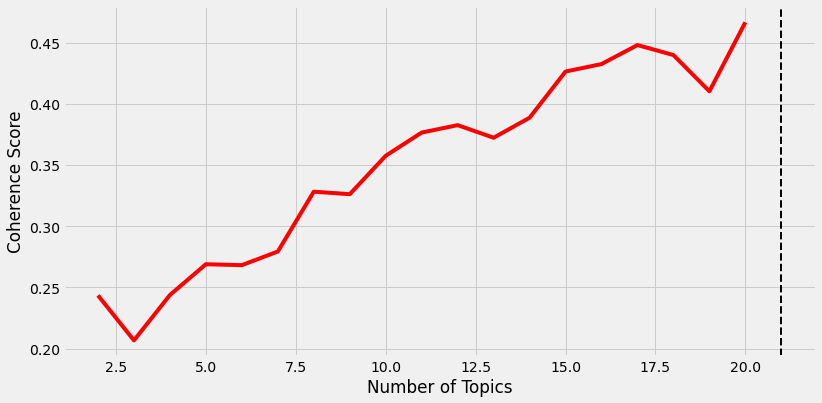

In [125]:


plt.style.use('fivethirtyeight')

x_ax = range(2, 21, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axvline(x=21, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')
#plt.axvline((three_down), color='g', linewidth=2)

The figure shows that 8 topics might be the most optimal. Therefore, I am going to run the model with 8 topics.

In [126]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.038*"dark" + 0.025*"look" + 0.017*"short" + 0.014*"skin" + 0.014*"bodi" + 0.013*"go" + 0.013*"miss" + 0.012*"work" + 0.011*"hair" + 0.010*"say"
Topic: 1 Word: 0.023*"skin" + 0.020*"heavi" + 0.019*"feel" + 0.016*"skinni" + 0.016*"dark" + 0.015*"short" + 0.013*"jean" + 0.012*"rain" + 0.012*"bodi" + 0.011*"love"
Topic: 2 Word: 0.051*"short" + 0.022*"like" + 0.015*"love" + 0.014*"bodi" + 0.012*"watch" + 0.012*"dark" + 0.011*"tall" + 0.011*"think" + 0.010*"week" + 0.009*"that"
Topic: 3 Word: 0.023*"bodi" + 0.022*"dark" + 0.013*"skin" + 0.013*"short" + 0.012*"hurt" + 0.011*"time" + 0.011*"heavi" + 0.010*"love" + 0.010*"night" + 0.009*"tweet"
Topic: 4 Word: 0.031*"short" + 0.022*"bodi" + 0.021*"good" + 0.015*"guy" + 0.015*"hair" + 0.014*"your" + 0.012*"mind" + 0.012*"thing" + 0.011*"life" + 0.011*"love"
Topic: 5 Word: 0.028*"short" + 0.021*"tall" + 0.020*"hair" + 0.017*"think" + 0.015*"bodi" + 0.013*"like" + 0.011*"morn" + 0.011*"heavi" + 0.010*"skinni" + 0.009*"dark"
Topic: 

I am now going to name these topics based on whether or not they are related to body. 

Topic 0: not body
<br>
Topic 1: body
<br>
Topic 2: body
<br>
Topic 3: body
<br>
Topic 4: body
<br>
Topic 5: body
<br>
Topic 6: not body
<br>
Topic 7: not body

In [127]:
print(len([*lda_model_tfidf[corpus_tfidf]]))

10782


In [128]:
#code adapted from Selva Prabhakaran: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

def format_topics_sentences(ldamodel=lda_model_tfidf, corpus=corpus_tfidf, texts=new_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(lda_model_tfidf[corpus_tfidf]):
        row = row_list[0] if lda_model_tfidf.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model_tfidf.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    sent_topics_df.shape
    #ignore the index in the concatenation and preserve the index in my filtered dataframe

    # Add original text to the end of the output
    contents = pd.Series(new_list)
    #print(sent_topics_df)
    #print(contents)
    #look at the size of them, assumption that they aren't the same size
    sent_topics_df = pd.concat([sent_topics_df, contents], ignore_index = True, axis=1) 
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_tfidf, corpus=corpus_tfidf, texts=new_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

<ipython-input-128-72a354595c94>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-128-72a354595c94>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.6805,"skin, heavi, feel, skinni, dark, short, jean, ...","[bodi, feel, itchi, like]"
1,1,6,0.5495,"short, love, skin, bodi, dark, heavi, friend, ...","[fall, asleep, hear, traci, girl, bodi, heart,..."
2,2,1,0.6978,"skin, heavi, feel, skinni, dark, short, jean, ...","[hate, peopl, diss, band, trace, clearli, ugli]"
3,3,2,0.5623,"short, like, love, bodi, watch, dark, tall, th...",[one]
4,4,7,0.7421,"bodi, ugli, short, know, dark, like, love, goo...","[thecoolestout, ehhh, dont, weather, gonna, tu..."
5,5,4,0.6638,"short, bodi, good, guy, hair, your, mind, thin...","[mind, bodi, sever, protest, quotget, upquot, ..."
6,6,2,0.6106,"short, like, love, bodi, watch, dark, tall, th...","[geez, busi, afternoon, meet, email, meet, ema..."
7,7,7,0.3898,"bodi, ugli, short, know, dark, like, love, goo...","[time, posterior, lose, articul, creak, run, d..."
8,8,1,0.6755,"skin, heavi, feel, skinni, dark, short, jean, ...","[wait, skinni, vega, hungri]"
9,9,5,0.4317,"short, tall, hair, think, bodi, like, morn, he...","[wait, airport, ride, harass, tri, sell, ugli,..."


In [129]:
df_dominant_topic.shape

(10782, 5)

In [130]:
data1.head()

,polarity,ids,date,flag,user,text,text2,text_2,vocab
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,1
44,0,1467819022,Mon Apr 06 22:21:56 PDT 2009,NO_QUERY,hpfangirl94,Falling asleep. Just heard about that Tracy gi...,Falling asleep. Just heard about that Tracy gi...,Falling asleep Just heard about that Tracy gir...,1
72,0,1467825863,Mon Apr 06 22:23:43 PDT 2009,NO_QUERY,BrookeAmanda,i really hate how people diss my bands! Trace...,i really hate how people diss my bands! Trace...,i really hate how people diss my bands Trace ...,1
88,0,1467835198,Mon Apr 06 22:26:08 PDT 2009,NO_QUERY,ItsBrigittaYo,why is it always the fat ones?!,why is it always the fat ones?!,why is it always the fat ones,1
129,0,1467841885,Mon Apr 06 22:27:56 PDT 2009,NO_QUERY,MissPassion,@thecoolestout Ehhh don't. Weather's gonna tak...,@thecoolestout Ehhh don't. Weather's gonna tak...,thecoolestout Ehhh dont Weathers gonna take a ...,1


In [131]:
new_data = data1.reset_index(drop = True)

In [132]:
new_data.head()

,polarity,ids,date,flag,user,text,text2,text_2,vocab
0,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,1
1,0,1467819022,Mon Apr 06 22:21:56 PDT 2009,NO_QUERY,hpfangirl94,Falling asleep. Just heard about that Tracy gi...,Falling asleep. Just heard about that Tracy gi...,Falling asleep Just heard about that Tracy gir...,1
2,0,1467825863,Mon Apr 06 22:23:43 PDT 2009,NO_QUERY,BrookeAmanda,i really hate how people diss my bands! Trace...,i really hate how people diss my bands! Trace...,i really hate how people diss my bands Trace ...,1
3,0,1467835198,Mon Apr 06 22:26:08 PDT 2009,NO_QUERY,ItsBrigittaYo,why is it always the fat ones?!,why is it always the fat ones?!,why is it always the fat ones,1
4,0,1467841885,Mon Apr 06 22:27:56 PDT 2009,NO_QUERY,MissPassion,@thecoolestout Ehhh don't. Weather's gonna tak...,@thecoolestout Ehhh don't. Weather's gonna tak...,thecoolestout Ehhh dont Weathers gonna take a ...,1


In [133]:
df_topic = pd.concat([new_data, df_dominant_topic], axis = 1)

In [134]:
df_topic.head()

,polarity,ids,date,flag,user,text,text2,text_2,vocab,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,1,0,1,0.6805,"skin, heavi, feel, skinni, dark, short, jean, ...","[bodi, feel, itchi, like]"
1,0,1467819022,Mon Apr 06 22:21:56 PDT 2009,NO_QUERY,hpfangirl94,Falling asleep. Just heard about that Tracy gi...,Falling asleep. Just heard about that Tracy gi...,Falling asleep Just heard about that Tracy gir...,1,1,6,0.5495,"short, love, skin, bodi, dark, heavi, friend, ...","[fall, asleep, hear, traci, girl, bodi, heart,..."
2,0,1467825863,Mon Apr 06 22:23:43 PDT 2009,NO_QUERY,BrookeAmanda,i really hate how people diss my bands! Trace...,i really hate how people diss my bands! Trace...,i really hate how people diss my bands Trace ...,1,2,1,0.6978,"skin, heavi, feel, skinni, dark, short, jean, ...","[hate, peopl, diss, band, trace, clearli, ugli]"
3,0,1467835198,Mon Apr 06 22:26:08 PDT 2009,NO_QUERY,ItsBrigittaYo,why is it always the fat ones?!,why is it always the fat ones?!,why is it always the fat ones,1,3,2,0.5623,"short, like, love, bodi, watch, dark, tall, th...",[one]
4,0,1467841885,Mon Apr 06 22:27:56 PDT 2009,NO_QUERY,MissPassion,@thecoolestout Ehhh don't. Weather's gonna tak...,@thecoolestout Ehhh don't. Weather's gonna tak...,thecoolestout Ehhh dont Weathers gonna take a ...,1,4,7,0.7421,"bodi, ugli, short, know, dark, like, love, goo...","[thecoolestout, ehhh, dont, weather, gonna, tu..."


In [135]:
df_topic = df_topic.drop(columns = ['ids', 'date', 'flag', 'user', 'text2', 'vocab'])

In [136]:
df_topic.head()

,polarity,text,text_2,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0,1,0.6805,"skin, heavi, feel, skinni, dark, short, jean, ...","[bodi, feel, itchi, like]"
1,0,Falling asleep. Just heard about that Tracy gi...,Falling asleep Just heard about that Tracy gir...,1,6,0.5495,"short, love, skin, bodi, dark, heavi, friend, ...","[fall, asleep, hear, traci, girl, bodi, heart,..."
2,0,i really hate how people diss my bands! Trace...,i really hate how people diss my bands Trace ...,2,1,0.6978,"skin, heavi, feel, skinni, dark, short, jean, ...","[hate, peopl, diss, band, trace, clearli, ugli]"
3,0,why is it always the fat ones?!,why is it always the fat ones,3,2,0.5623,"short, like, love, bodi, watch, dark, tall, th...",[one]
4,0,@thecoolestout Ehhh don't. Weather's gonna tak...,thecoolestout Ehhh dont Weathers gonna take a ...,4,7,0.7421,"bodi, ugli, short, know, dark, like, love, goo...","[thecoolestout, ehhh, dont, weather, gonna, tu..."


In [137]:
df_topic['Topic'] = df_topic['Dominant_Topic'].replace(to_replace=[0,1,2,3,4,5,6,7], value = ['not body', 'body', 'body', 'body', 'body', 'body', 'not body', 'not body'])

In [138]:
df_topic.head()

,polarity,text,text_2,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Topic
0,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0,1,0.6805,"skin, heavi, feel, skinni, dark, short, jean, ...","[bodi, feel, itchi, like]",body
1,0,Falling asleep. Just heard about that Tracy gi...,Falling asleep Just heard about that Tracy gir...,1,6,0.5495,"short, love, skin, bodi, dark, heavi, friend, ...","[fall, asleep, hear, traci, girl, bodi, heart,...",not body
2,0,i really hate how people diss my bands! Trace...,i really hate how people diss my bands Trace ...,2,1,0.6978,"skin, heavi, feel, skinni, dark, short, jean, ...","[hate, peopl, diss, band, trace, clearli, ugli]",body
3,0,why is it always the fat ones?!,why is it always the fat ones,3,2,0.5623,"short, like, love, bodi, watch, dark, tall, th...",[one],body
4,0,@thecoolestout Ehhh don't. Weather's gonna tak...,thecoolestout Ehhh dont Weathers gonna take a ...,4,7,0.7421,"bodi, ugli, short, know, dark, like, love, goo...","[thecoolestout, ehhh, dont, weather, gonna, tu...",not body


In [139]:
#df_topic['Sentiment'] = data1['polarity']

In [140]:
def conditions(s):
    if (s['Topic'] == 'body') and (s['polarity'] == 0):
        return 'Yes'
    else:
        return 'No'

In [141]:
df_topic['Body_Shaming'] = df_topic.apply(conditions, axis=1)

In [142]:
df_topic.head()

,polarity,text,text_2,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Topic,Body_Shaming
0,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0,1,0.6805,"skin, heavi, feel, skinni, dark, short, jean, ...","[bodi, feel, itchi, like]",body,Yes
1,0,Falling asleep. Just heard about that Tracy gi...,Falling asleep Just heard about that Tracy gir...,1,6,0.5495,"short, love, skin, bodi, dark, heavi, friend, ...","[fall, asleep, hear, traci, girl, bodi, heart,...",not body,No
2,0,i really hate how people diss my bands! Trace...,i really hate how people diss my bands Trace ...,2,1,0.6978,"skin, heavi, feel, skinni, dark, short, jean, ...","[hate, peopl, diss, band, trace, clearli, ugli]",body,Yes
3,0,why is it always the fat ones?!,why is it always the fat ones,3,2,0.5623,"short, like, love, bodi, watch, dark, tall, th...",[one],body,Yes
4,0,@thecoolestout Ehhh don't. Weather's gonna tak...,thecoolestout Ehhh dont Weathers gonna take a ...,4,7,0.7421,"bodi, ugli, short, know, dark, like, love, goo...","[thecoolestout, ehhh, dont, weather, gonna, tu...",not body,No


In [143]:
df_topic['Body_Shaming'].value_counts()

No     6966
Yes    3816
Name: Body_Shaming, dtype: int64

In [144]:
df_topic['polarity'].value_counts()

0    6678
4    4104
Name: polarity, dtype: int64

In [145]:
#df_topic.reset_index(drop=True)

In [146]:
body_shaming = df_topic[df_topic['Body_Shaming']== 'Yes']

In [147]:
#df_topic.dropna(inplace=True)

### Countplot of body shaming tweets

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

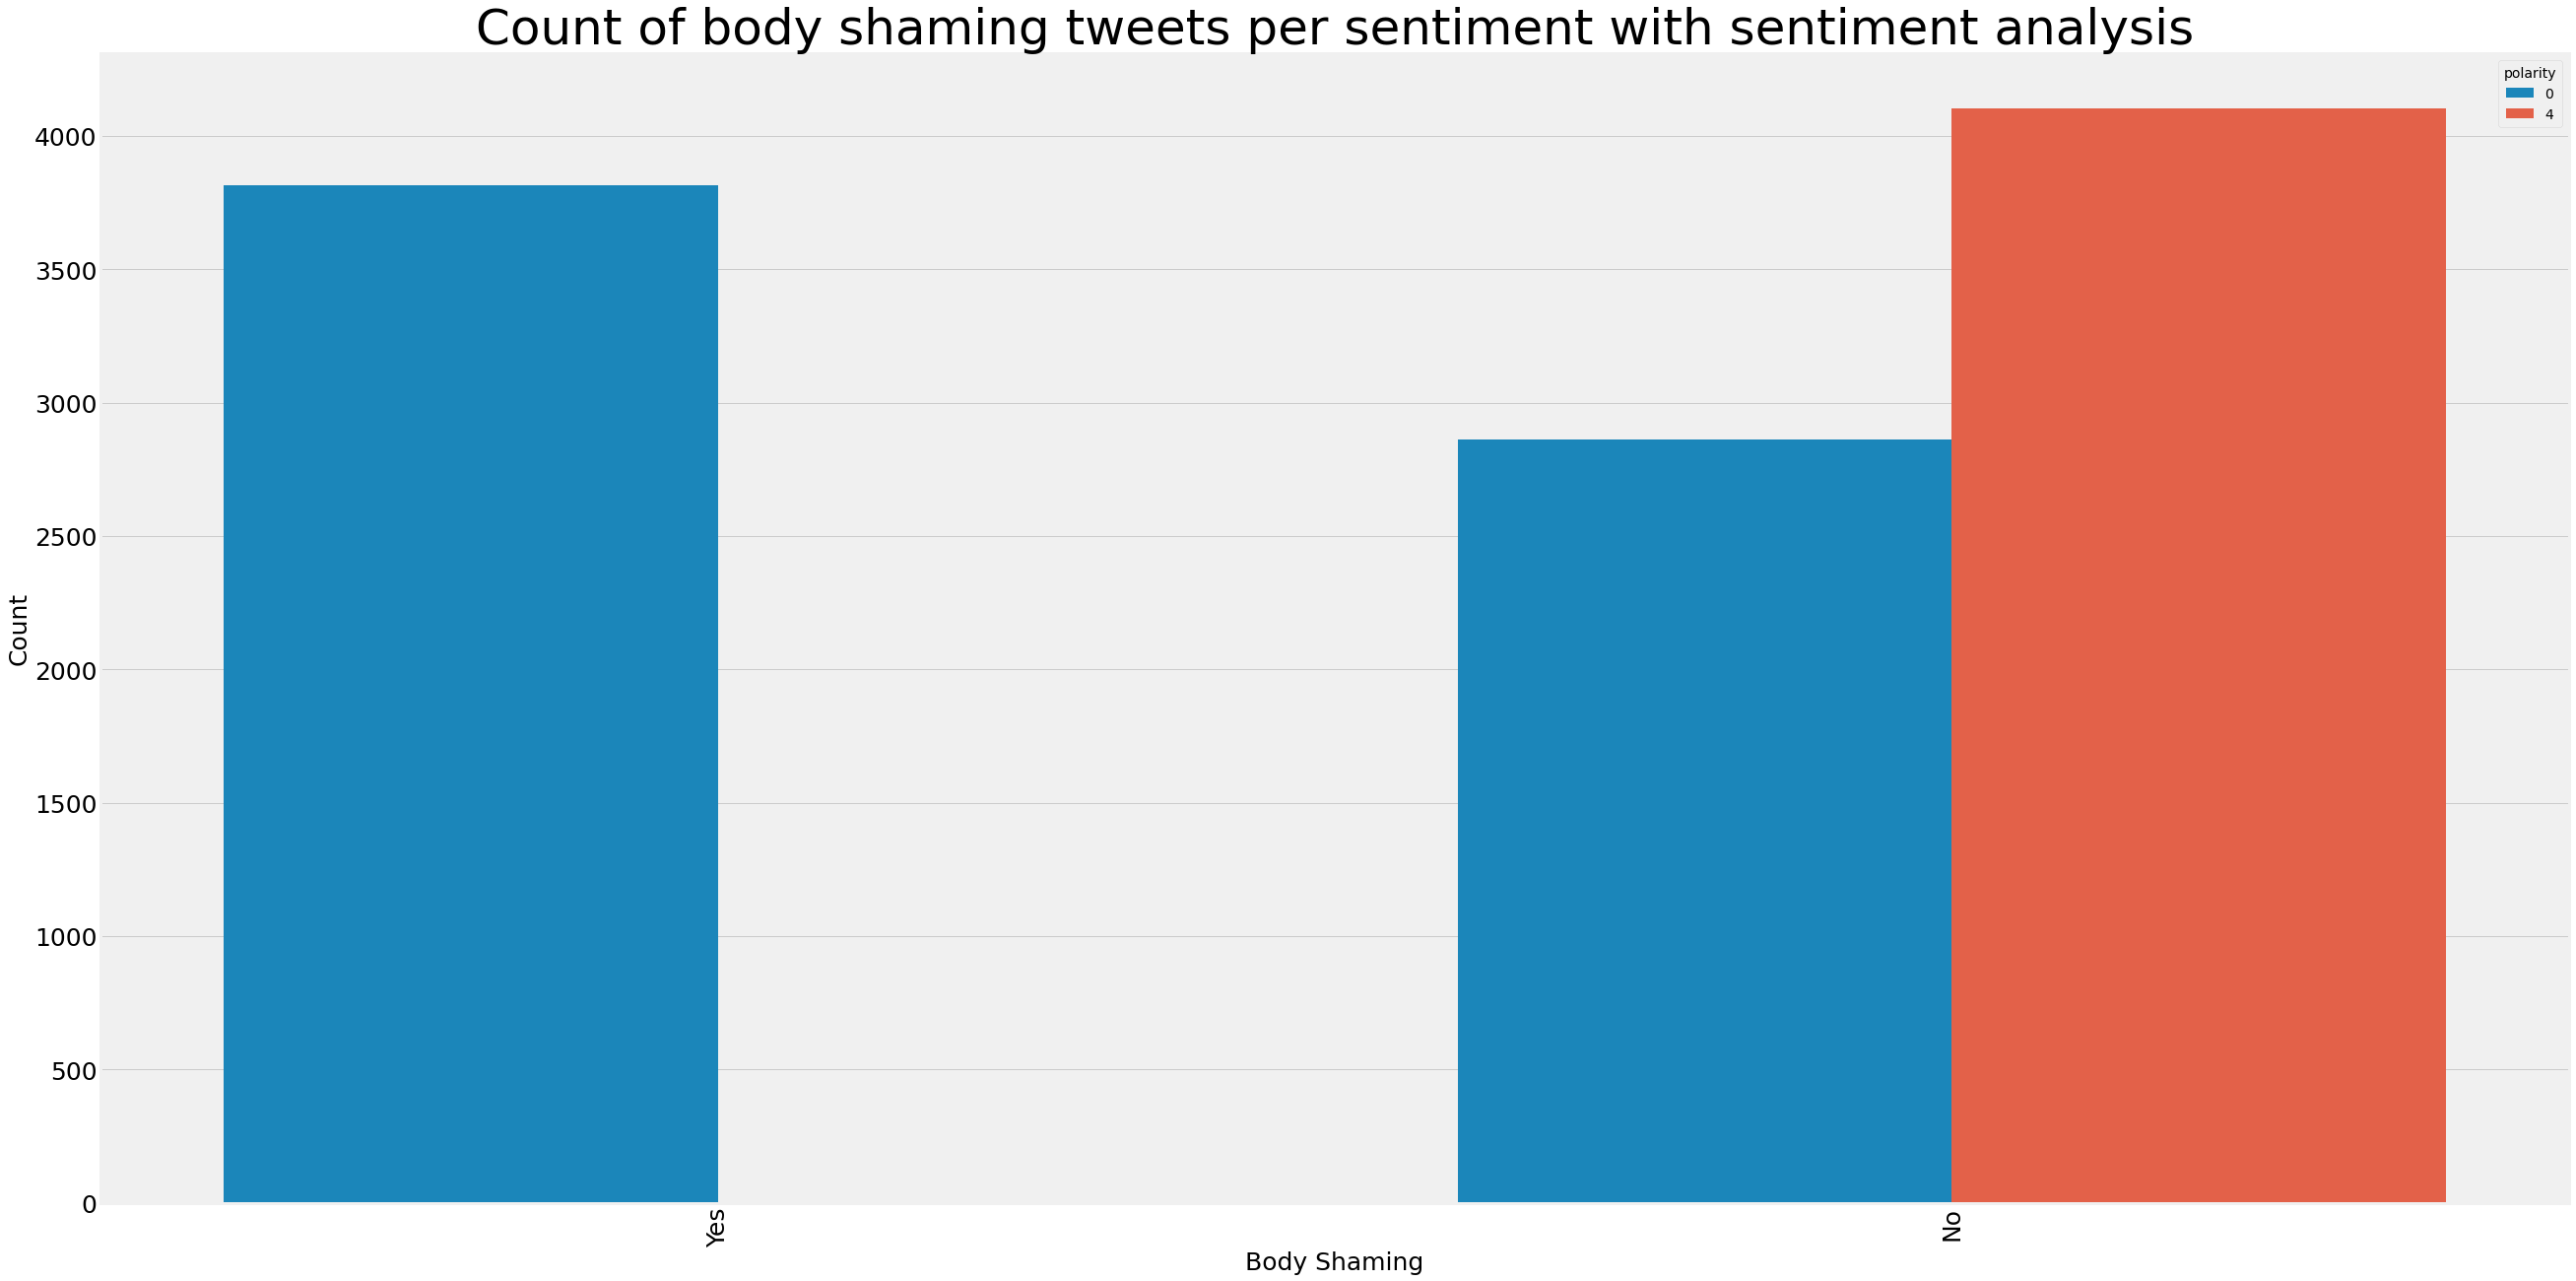

In [148]:
import seaborn as sns
plt.figure(figsize= (40,20))
sns.countplot(x = 'Body_Shaming', hue = 'polarity', data = df_topic)
plt.xlabel('Body Shaming', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
#plt.ylim(10, 40)
plt.title('Count of body shaming tweets per sentiment with sentiment analysis', fontsize = 50)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize = 25)

#countplots, wordclouds, spot_checking and discussion


The count of body shaming tweets is less compared to those that are not.

In [149]:
body_shaming.head()

,polarity,text,text_2,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Topic,Body_Shaming
0,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0,1,0.6805,"skin, heavi, feel, skinni, dark, short, jean, ...","[bodi, feel, itchi, like]",body,Yes
2,0,i really hate how people diss my bands! Trace...,i really hate how people diss my bands Trace ...,2,1,0.6978,"skin, heavi, feel, skinni, dark, short, jean, ...","[hate, peopl, diss, band, trace, clearli, ugli]",body,Yes
3,0,why is it always the fat ones?!,why is it always the fat ones,3,2,0.5623,"short, like, love, bodi, watch, dark, tall, th...",[one],body,Yes
5,0,My mind and body are severely protesting this ...,My mind and body are severely protesting this ...,5,4,0.6638,"short, bodi, good, guy, hair, your, mind, thin...","[mind, bodi, sever, protest, quotget, upquot, ...",body,Yes
6,0,"Geez what a busy afternoon. Meetings, emails, ...",Geez what a busy afternoon Meetings emails mee...,6,2,0.6106,"short, like, love, bodi, watch, dark, tall, th...","[geez, busi, afternoon, meet, email, meet, ema...",body,Yes


### Wordcloud of body shaming tweets.

In [150]:
shaming_tweets = body_shaming['text_2']

In [151]:
from collections import Counter
# # transform the text into a list of words
# words_list = text1.split(' ')
# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']
# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords_shame = [ word for word in shaming_tweets if word not in stopwords ]

In [152]:
wordcloud_shaming = WordCloud().generate(" ".join(words_without_stopwords_shame))

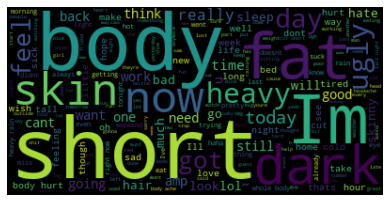

In [153]:
plt.imshow(wordcloud_shaming, interpolation='bilinear')
plt.axis("off")
plt.show()

In [155]:
#body_shaming.to_csv('bodyshaming.csv', index = False)

In [156]:
notbody_shaming = df_topic[df_topic['Body_Shaming']== 'No']

In [157]:
#notbody_shaming.to_csv('notbodyshaming.csv', index = False)